In [1]:
import pandas as pd #Pandas library import for Excel Using
import numpy as np #Numpy module import
import keras 
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Model, Sequential
from keras.layers import Dense

Using TensorFlow backend.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [15]:
Excelfile = pd.ExcelFile('dataset_for_Flowering_3.xlsx')
df = pd.read_excel(Excelfile)

In [16]:
df

,Tem2,Tem3,Rain2,Rain3,Sun3,365percent
1,-1.6,8.1,29.6,49.5,209.1,92
2,-0.2,6.3,11.1,7.9,255.2,96
3,0.2,7.0,47.6,40.5,253.7,92
4,1.0,6.3,22.7,9.6,270.8,93
5,1.9,7.9,16.2,7.2,214.7,87
6,-1.2,5.1,74.1,27.3,256.3,105
7,-2.0,5.1,0.8,47.4,191.8,92
8,1.2,3.6,29.1,14.6,240.2,103
9,1.4,4.3,55.3,82.5,133.0,102
10,2.9,6.0,36.9,63.9,202.7,96


In [4]:
train_data = df.loc[1:104]
test_data = df.loc[105:112]

In [5]:
train_y = train_data['365percent']
train_data = train_data.drop('365percent', axis=1)

test_y = test_data['365percent']
test_data = test_data.drop('365percent', axis=1)

In [6]:
print("Training set: {}".format(train_data.shape))  # ??? examples, 5 features
print("Testing set:  {}".format(test_data.shape))   # ??? examples, 5 features

Training set: (104, 5)
Testing set:  (8, 5)


In [7]:
print(train_data.head(2))  # Display sample features, notice the different scales

   Tem2  Tem3  Rain2  Rain3   Sun3
1  -1.6   8.1   29.6   49.5  209.1
2  -0.2   6.3   11.1    7.9  255.2


In [8]:
column_names = ['Tem2', 'Tem3', 'Rain2', 'Rain3', 'Sun3']

df = pd.DataFrame(train_data, columns=column_names)
df.head(8)

,Tem2,Tem3,Rain2,Rain3,Sun3
1,-1.6,8.1,29.6,49.5,209.1
2,-0.2,6.3,11.1,7.9,255.2
3,0.2,7.0,47.6,40.5,253.7
4,1.0,6.3,22.7,9.6,270.8
5,1.9,7.9,16.2,7.2,214.7
6,-1.2,5.1,74.1,27.3,256.3
7,-2.0,5.1,0.8,47.4,191.8
8,1.2,3.6,29.1,14.6,240.2


In [9]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer= 'adam',
                metrics=['mae'])
  return model

In [10]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

# Store training stats
history = model.fit(train_data, train_y, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

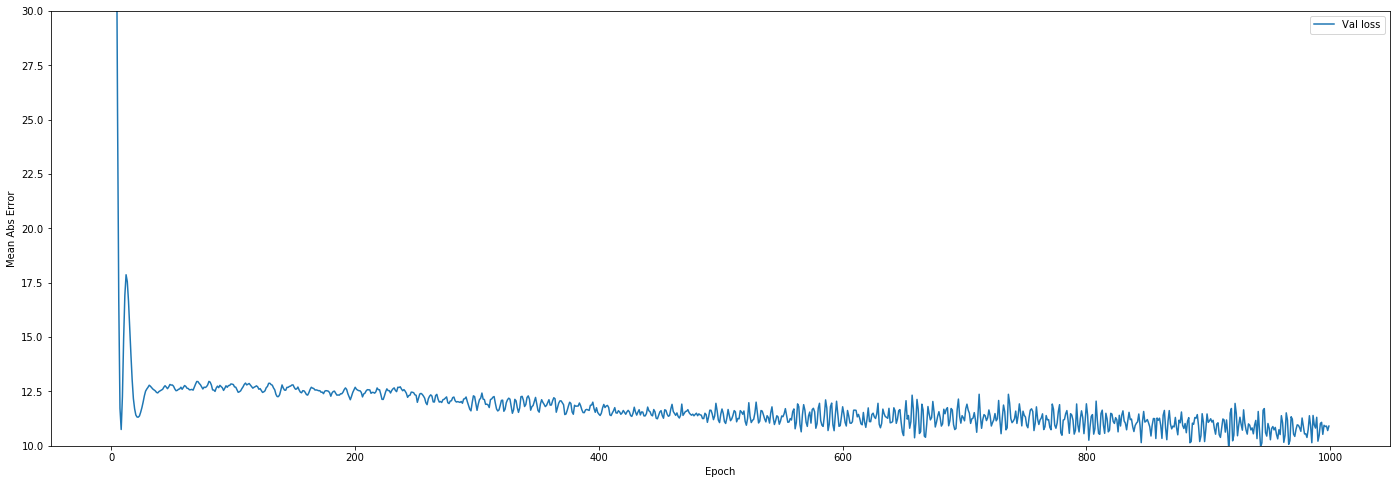

In [17]:
def plot_history(history):
  f, ax = plt.subplots(figsize=(24,8))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([10, 30])

plot_history(history)

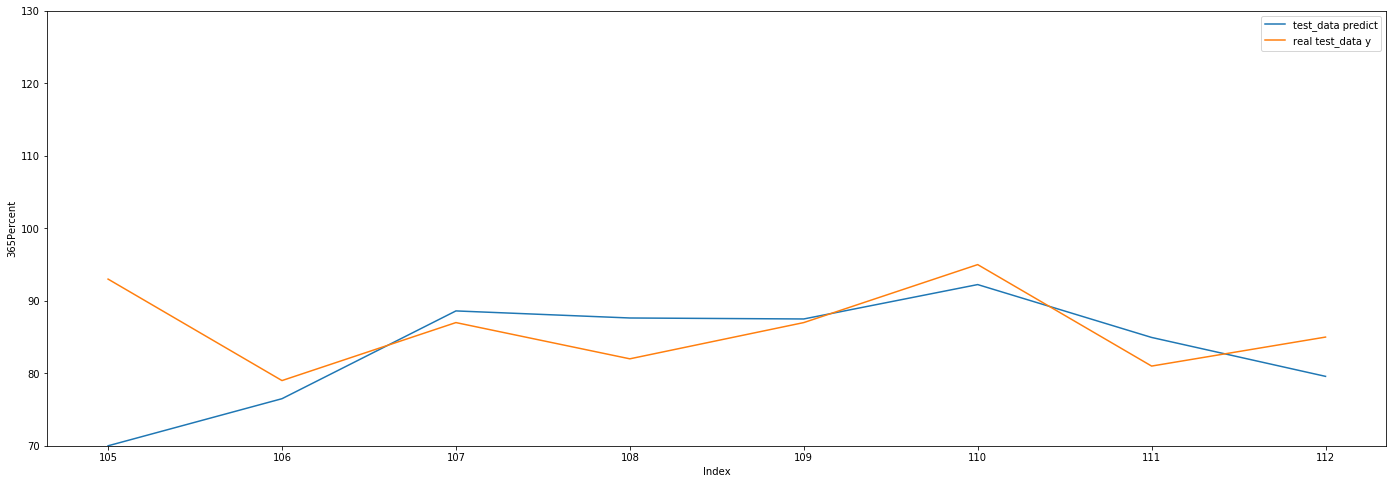

In [13]:
def plot_result():
  f, ax = plt.subplots(figsize=(24,8))
  plt.xlabel('Index')
  plt.ylabel('365Percent')
  plt.plot(test_data.index, model.predict(test_data),
           label='test_data predict')
  plt.plot(test_data.index, test_y,
           label = 'real test_data y')
  plt.legend()
  plt.ylim([70, 130])

plot_result()

In [14]:
print('365percent')
(test_data.index, model.predict(test_data))

365percent


(Int64Index([105, 106, 107, 108, 109, 110, 111, 112], dtype='int64'),
 array([[70.000854],
        [76.49924 ],
        [88.60901 ],
        [87.63414 ],
        [87.49878 ],
        [92.24399 ],
        [84.949524],
        [79.58083 ]], dtype=float32))